In [1]:
# Install necessary libraries
!pip install pandas numpy matplotlib seaborn yfinance mplfinance statsmodels scikit-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.0/75.0 kB 2.0 MB/s eta 0:00:00


In [8]:
import yfinance as yf
import pandas as pd

# Fetch data for Apple Inc. (AAPL)
ticker = 'AAPL'
data = yf.download(ticker, start='2000-01-01', end='2024-01-01')

# Display the first few rows of the dataset
data.head()

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2000-01-03,0.936384,1.004464,0.907924,0.999442,0.844004,535796800
2000-01-04,0.966518,0.987723,0.903460,0.915179,0.772846,512377600
2000-01-05,0.926339,0.987165,0.919643,0.928571,0.784155,778321600
2000-01-06,0.947545,0.955357,0.848214,0.848214,0.716296,767972800
2000-01-07,0.861607,0.901786,0.852679,0.888393,0.750226,460734400


In [9]:
# Check for missing values
print(data.isnull().sum())

# Fill missing values using forward fill method
data = data.fillna(method='ffill')

# Verify that there are no missing values
data.isnull().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64


<ipython-input-9-8c0c42cf48dd>:5: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data = data.fillna(method='ffill')


,0
Open,0
High,0
Low,0
Close,0
Adj Close,0
Volume,0


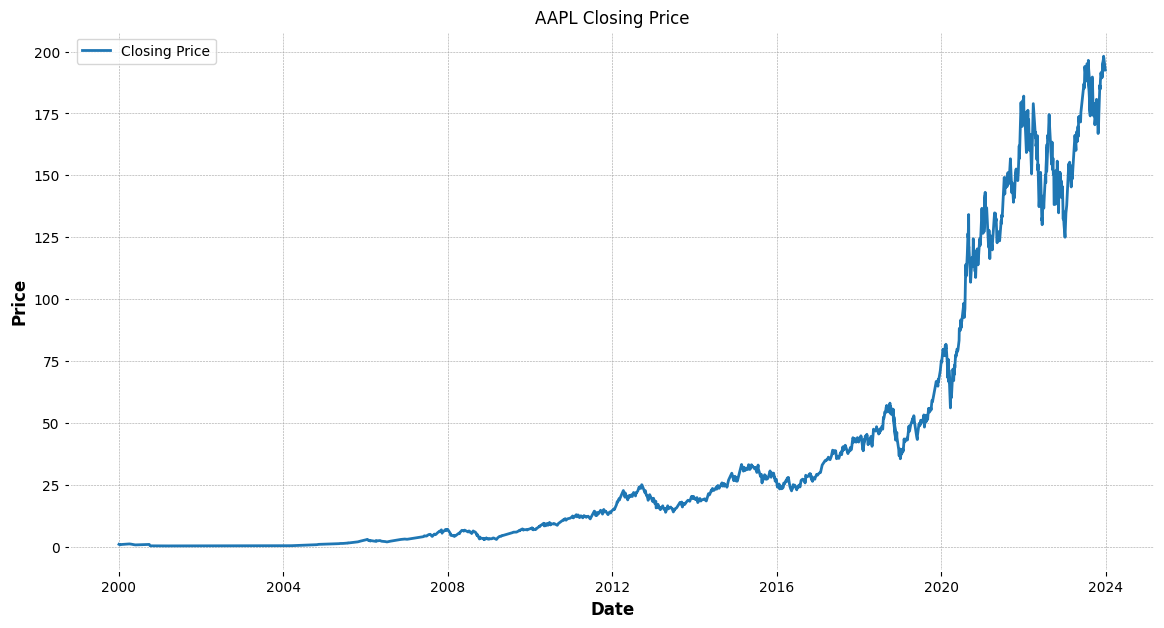

/usr/local/lib/python3.10/dist-packages/mplfinance/_arg_validators.py:84: UserWarning: 


            POSSIBLE TO SEE DETAILS (Candles, Ohlc-Bars, Etc.)
   For more information see:
   - https://github.com/matplotlib/mplfinance/wiki/Plotting-Too-Much-Data
   
   TO SILENCE THIS WARNING, set `type='line'` in `mpf.plot()`
   OR set kwarg `warn_too_much_data=N` where N is an integer 
   LARGER than the number of data points you want to plot.

  warnings.warn('\n\n ================================================================= '+


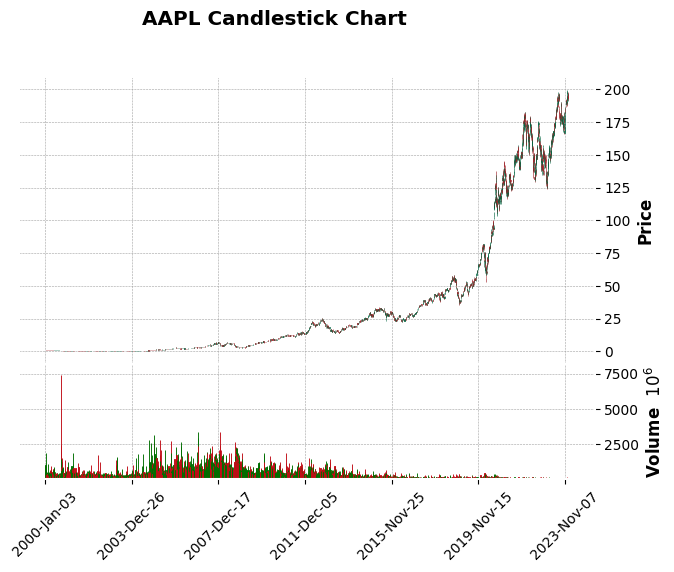

In [10]:
import matplotlib.pyplot as plt
import mplfinance as mpf

# Line Plot of Closing Prices
plt.figure(figsize=(14, 7))
plt.plot(data['Close'], label='Closing Price')
plt.title(f'{ticker} Closing Price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

# Candlestick Chart
mpf.plot(data, type='candle', style='charles', title=f'{ticker} Candlestick Chart', volume=True)


[*********************100%%**********************]  1 of 1 completed


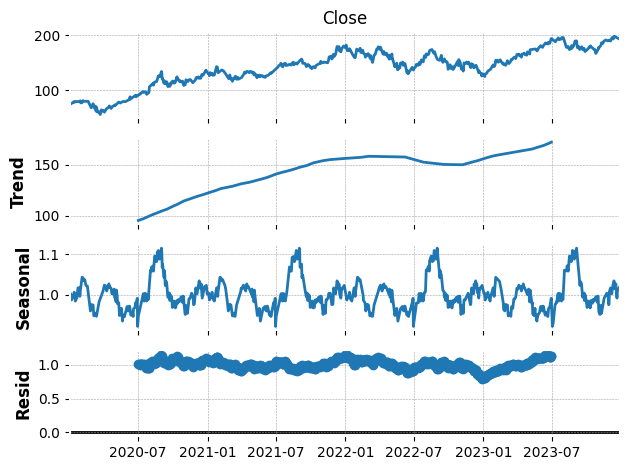

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
import yfinance as yf

# Fetch data for Apple Inc. (AAPL)
ticker = 'AAPL'
data = yf.download(ticker, start='2020-01-01', end='2024-01-01')

# Ensure the DataFrame index is a DatetimeIndex
data.index = pd.to_datetime(data.index)

# Define the period for seasonal decomposition
period = 252  # Trading days in a year

# Decompose the time series
result = seasonal_decompose(data['Close'], model='multiplicative', period=period)
result.plot()
plt.show()


Mean Squared Error: 88.28818253197582


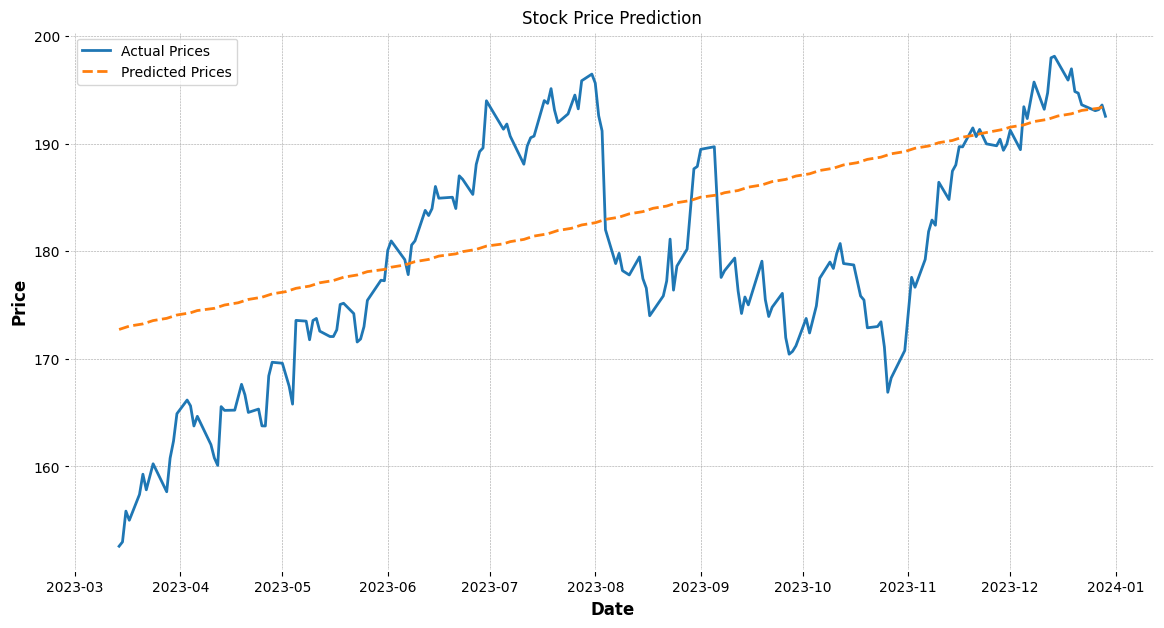

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Prepare features and target variable
data['Day'] = range(len(data))
X = data[['Day']]
y = data['Close']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# Plot predictions vs actual values
plt.figure(figsize=(14, 7))
plt.plot(data.index[-len(y_test):], y_test, label='Actual Prices')
plt.plot(data.index[-len(y_test):], y_pred, label='Predicted Prices', linestyle='--')
plt.title('Stock Price Prediction')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()